# INTRODUCTION

Vehicle electrification is widely regarded as a critical tool for climate change mitigation in the transportation sector [@musti2011]. While the United States is seeing an increasing share of electric sales, the pace of adoption remains well below the necessary level to mitigate climate change impacts. One barrier to widespread adoption is the lack of charging infrastructure [@sullivan2021].

A common policy put forward to increase electric vehicle adoption is a federal income tax credit for EV buyers. However, spending similar amounts on increasing deployment of charging stations could yield more effective results [@Li2017]. This is especially the case in the early stages of EV market penetration; EV markets that have critical-mass constraints have the most success in increasing market penetration with a subsidy policy that deals with indirect network effects [@Zhou2018]. One of the indirect network effects on the EV market comes from the charging station market.

Subsidies for charging stations are found to be most effective because of the low-price sensitivity of early EV adopters [@Li2017]. This is intuitive because early EV adopters are more eager to purchases EVs, which makes them more willing to pay for higher prices. The issue these consumers are concerned with is their ability to utilize this new technology, which is affected by the existing charging station infrastructure. Because of this, understanding consumer’s preferences for charging station infrastructure is crucial. Consumers are willing to pay about 5 cents per mile for plug-in electric vehicles and about 10 cents per minute of wait time while refueling. Consumers are also willing to wait up to 8 minutes longer during refueling [@Sheldon2019]. Knowing this information can allow policy makers to create subsidy programs that produce more effective outcomes.

Nick TO DO:
- Expand discussion to focus on the need for EVs in climate policy in general (can draw from Net Zero America and Zero Carbon America studies and others)
- Focus on what drives EV adoption according to literature
- Talk about the infrastructure bill and its investment in charging stations

In [37]:
# import data packages
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from PIL import Image
# import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import mapclassify as mc
import geoplot.crs as gcrs
import geoplot as gplt
from geopy.geocoders import Nominatim
from shapely.geometry import Point
# import statistics packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from libpysal.weights import Queen
from nonlincausality.nonlincausality import nonlincausalityMLP, nonlincausalityGRU, nonlincausalityLSTM, nonlincausalityNN, nonlincausalityARIMA
from causal_curve import Mediation
from causal_curve import GPS_Regressor
# import assorted packages
import os
import datetime
import random
import itertools
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='once')
warnings.simplefilter(action='once', category=FutureWarning)

# setting publish to true skips time consuming data generation tasks and assumes data are being loaded from a previous run
publish = True

# THE ELECTRIC VEHICLE AND CHARGING STATION PROBLEM
Nick TO DO:
- More of a technical focus on what's been done in the academic literature on the specific problem

Electric vehicle ownership is often referenced as exhibiting a "chicken and egg" behavior arising from the supply and demand relationship. Individual demand for electric vehicles is influenced by the available supply of charging points. Consumers are unwilling to purchase vehicles due to range anxiety and a perceived lack of charging stations. Suppliers are not incentivized to provide charging stations unless there is sufficient demand to warrant their cost. There is a clear role for public policy in such situations. The government deems electric vehicles as a solution to a public ill (i.e., climate change) and can incentivize either suppliers by providing installation subsidies or consumers by installing charging stations. While the problem has been recognized in the literature [@melliger2018], empirical analysis is minimal.

An important consideration to the analysis is how electric mobility system may differ from one based on fossil fuels. In the conventional private mobility model, the individual owns the vehicle and purchases fuel from centralized and privately owned refueling stations. In contrast, electric vehicles may be charged in the home using previously existing infrastructure. The presence of charging points in the home begs the questions 1) if (or to what extent) out-of-home charging stations are required for travel? and 2) to what extent is range anxiety a perception versus a reality?

According to the Bureau of Transportation Statistics, 98% of trips made in the US are less than 50 miles [@vehicletechnologyoffice2022]. Given that most battery-electric vehicles (BEVs) have a range greater than 200 miles [@elfalan2021], it is feasible to make most trips on a single charge. However, long-distance trips (over 50 miles) comprise 30% of total vehicle-miles traveled (VMT) [@aultman-hall2018]. There is clearly a need for out-of-home charging stations to accommodate these trips. Even if most trips can be accommodated by in-home charging, the vehicle purchase decision will be influenced by consideration of these longer trips that require charging stations [@silvia2016]. Additionally, Wolbertus et al. [@wolbertus2018] find that there is still a demand for charging stations in places where public daytime charging is the only option, such as at the workplace.

# METHODS
## Non-Linear Granger Causality


## Potential Outcomes Causality Via Propensity Score Matching


# DATA

We use a combination of open-source and purchased data in our analysis. The two key input datasets are charging station locations provided by the Alternative Fuel Data Center (AFDC) and electric vehicle registrations provided by Experian Inc. The vehicle registration dataset comprises a 10-year panel at 2-year increments (2012, 2014, 2016, 2018, 2020). Total vehicle registrations are recorded by county, make, model, year, and other vehicle characteristics for the United States.

After filtering out protectorates and other state-state locations, several county codes in the Experian data remain that are missing registration totals in a subsset of years (192/3172, or about 6%). We remove county codes with more than one missing year, leaving 186 for which registration totals are interpolated from adjacent years. Many of these county codes are for remote areas with low populations (e.g., the Aleutian Islands in Alaska and much of Idaho).

Nick TO DO:
- Could help describe the data we used a bit

In [38]:
#  https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [39]:
def impute_veh_regs(df):
    geo_ct = df.GEOID.value_counts()==4
    cty_list = np.unique(df[df.GEOID.isin(geo_ct[geo_ct].index)].GEOID.values) # record count is 4 for the county
    yr_set = set([2012,2014,2016,2018,2020])
    for cty in cty_list:
        temp = df[df.GEOID==cty]
        miss_yr = (yr_set-set(temp.YEAR)).pop()
        row = temp.iloc[0].copy() # initialize new row to the first row in dataset
        row.loc["YEAR"] = miss_yr
        if(miss_yr==2012):
            row[~row.index.isin(["GEOID","YEAR"])] = np.reshape(temp.loc[temp.YEAR==2014,~temp.columns.isin(["GEOID","YEAR"])].values - (temp.loc[temp.YEAR==2016,~temp.columns.isin(["GEOID","YEAR"])].values - temp.loc[temp.YEAR==2014,~temp.columns.isin(["GEOID","YEAR"])].values),-1)
        elif(miss_yr==2020):
            row[~row.index.isin(["GEOID","YEAR"])] = np.reshape(temp.loc[temp.YEAR==2018,~temp.columns.isin(["GEOID","YEAR"])].values + (temp.loc[temp.YEAR==2018,~temp.columns.isin(["GEOID","YEAR"])].values - temp.loc[temp.YEAR==2016,~temp.columns.isin(["GEOID","YEAR"])].values),-1)
        else:
            row[~row.index.isin(["GEOID","YEAR"])] = np.reshape((temp.loc[temp.YEAR==(miss_yr+2),~temp.columns.isin(["GEOID","YEAR"])].values + temp.loc[temp.YEAR==(miss_yr-2),~temp.columns.isin(["GEOID","YEAR"])].values)/2,-1)                                       
        df = pd.concat((df,row.to_frame().T),ignore_index=True)
    return(df)

In [40]:
def fill_station_lags(df, id_col, yr_col, ch_col):
    cty_list = np.unique(df[:,id_col])
    for cty in cty_list:
        temp = df[df[:,id_col]==cty]
        yr_list = temp[:,yr_col]
        yr_set = set(yr_list)
        i = 0
        for yr in range(2012,2021,1):
            if(yr>np.min(yr_list)): # if the year is after the first installation year (prior years will be autofilled as zero when merged with registration data)
                if(yr not in yr_list): # if the year isn't in the list of years for the county
                    row = temp[i].copy()
                    row[yr_col] = yr
                    row[ch_col:ch_col+2] = 0 # no stations installed in this year
                    row_mat = row[np.newaxis]
                    df = np.vstack((df,row_mat))
                else:
                    i+=1 # update previous row id if the year is in temp df
    return(df)

In [41]:
if publish:
    gdf = pd.read_parquet("../Data/combined_data.parquet")
else:

    # load county shapefile
    US_sf = gpd.read_file("../Data/GIS/cb_2018_us_county_5m/cb_2018_us_county_5m.shp")
    #Removing the outlying islands and other territories. 
    US_sf["STATEFP"] =pd.to_numeric(US_sf["STATEFP"])
    US_sf = US_sf[US_sf['STATEFP'] < 57]
    US_sf = US_sf.to_crs(2163)

    # load in state population totals
    df_pop = pd.read_csv("../Data/Census/PopByState/state_pop_est_2019.csv")
    df_pop['STATE'] = df_pop['Geographic Area'].map(us_state_to_abbrev)

    # load charging station data
    df_ch_stn = pd.read_csv("../Data/Transport/alt_fuel_stations_w_county.csv")
    print("df_ch_stn all",df_ch_stn.shape[0])
    print("df_ch_stn no private",df_ch_stn.shape[0])
    df_ch_stn = df_ch_stn[pd.notnull(df_ch_stn["Open Date"])]
    print("df_ch_stn (after removing nan open year",df_ch_stn.shape[0])
    df_ch_stn = df_ch_stn.assign(YEAR=pd.to_datetime(df_ch_stn.loc[:,'Open Date']).dt.year.astype(int))
    #df_ch_stn = df_ch_stn.drop(columns="Open Date")
    df_ch_stn = df_ch_stn[df_ch_stn.STATEFP<=56]
    id_col = df_ch_stn.columns.get_loc("GEOID")
    yr_col = df_ch_stn.columns.get_loc("YEAR")
    ch_col = df_ch_stn.columns.get_loc("EVSE-L01")
    df_ch_stn = pd.DataFrame(data=fill_station_lags(df_ch_stn.values, id_col, yr_col,ch_col), columns=df_ch_stn.columns)
    geometry = [Point(xy) for xy in zip(df_ch_stn.Longitude, df_ch_stn.Latitude)]
    crs = {'init' :'epsg:2163'}
    geo_ch_stn = gpd.GeoDataFrame(df_ch_stn, crs=crs, geometry=geometry)
    grp_ch_stn = df_ch_stn.groupby(["GEOID","YEAR"]).sum()[["EVSE-L01","EVSE-L02","EVSE-L03"]].reset_index()
    grp_ch_stn["cEVSE-L01"]=grp_ch_stn[["GEOID","EVSE-L01"]].groupby("GEOID").cumsum()
    grp_ch_stn["cEVSE-L02"]=grp_ch_stn[["GEOID","EVSE-L02"]].groupby("GEOID").cumsum()
    grp_ch_stn["cEVSE-L03"]=grp_ch_stn[["GEOID","EVSE-L03"]].groupby("GEOID").cumsum()
    grp_ch_stn["cEVSE"]=grp_ch_stn["cEVSE-L01"]+grp_ch_stn["cEVSE-L02"]+grp_ch_stn["cEVSE-L03"]

    # load vehicle registrations data
    df_veh_reg = pd.read_parquet("../Data/Transport/Experian Registrations/sum_registrations.parquet")
    # print("Pos1:",df_veh_reg.groupby("GEOID").count()["YEAR"].value_counts())
    df_veh_reg.rename(columns={"year":"YEAR"},inplace=True)
    # fill nan with zero and aggregate electricity columns
    df_veh_reg.fillna(0, inplace=True)
    df_veh_reg = impute_veh_regs(df_veh_reg)
    df_veh_reg = df_veh_reg.assign(bev=df_veh_reg["24kw Electric~Electric"]+df_veh_reg["60kw Electric~Electric"]+df_veh_reg["85kw Electric~Electric"]+df_veh_reg["90kw Electric~Electric"]+df_veh_reg["Electric"]+df_veh_reg["Electric Fuel System"])
    df_veh_reg = df_veh_reg.assign(pev=(df_veh_reg["bev"]+df_veh_reg["Plug-In Hybrid"]))
    # percent bev is bev/total vehicles
    df_veh_reg = df_veh_reg.assign(per_bev=df_veh_reg["bev"] / df_veh_reg["All"])
    # percent pev is (bev+phev)/total vehicles
    df_veh_reg = df_veh_reg.assign(per_pev=df_veh_reg["pev"] / df_veh_reg["All"])
    
    # combine registration and charging data by year and county code
    df = df_veh_reg.merge(grp_ch_stn.loc[:,["GEOID","YEAR","cEVSE-L01","cEVSE-L02","cEVSE-L03","cEVSE"]],how="left",on=["GEOID","YEAR"])
    # add additional columns for lagged charging station counts
    df["lag_year"] = df.YEAR-1
    df = df.merge(grp_ch_stn.loc[:,["GEOID","YEAR","cEVSE-L01","cEVSE-L02","cEVSE-L03","cEVSE"]],how="left",left_on=["GEOID","lag_year"],right_on=["GEOID","YEAR"],suffixes=("","_lag"))
    df["GEOID"] = df["GEOID"].astype(int)
    
    # read in demographic data by county and add to main dataframe
    df_pop11 = pd.read_csv("../Data/Census/county_pop_race_age_2011_2015.csv")
    df_pop15 = pd.read_csv("../Data/Census/county_pop_race_age_2015_2019.csv") 
    df_dem = pd.read_csv("../Data/Census/county_race_income.csv")
    df_dem["Percent_Minority"] = (df_dem["ADK5E004"]+df_dem["ADK5E005"]+df_dem["ADK5E007"]+df_dem["ADK5E012"]+df_dem["ADK5E008"])/df_dem["ADK5E001"]
    df_dem.loc[df_dem.YEAR==2012,"ABDPE001"] = df_dem.loc[df_dem.YEAR==2012,"ABDPE001"]*1.08 # adjust to 2019$ rather than 2014$ https://data.bls.gov/cgi-bin/cpicalc.pl?cost1=1.00&year1=201411&year2=201911
    df_dem14 = df_dem[df_dem.YEAR==2012]
    df_dem14 = df_dem14.assign(YEAR=2014)         
    df_dem18 = df_dem[df_dem.YEAR==2016]
    df_dem18 = df_dem18.assign(YEAR=2018)  
    df_dem20 = df_dem[df_dem.YEAR==2016]
    df_dem20 = df_dem20.assign(YEAR=2020)  
    df_dem = pd.concat((df_dem,df_dem14,df_dem18,df_dem20))

    # read in egrid data and add to main dataframe
    df_egrid = pd.read_csv("../Data/eGrid/egrid_data_co2.csv")

    # read in elections data and add to main dataframe
    df_elec = pd.read_csv("../Data/Elections/county_pres_2020.csv")
    df_elec = df_elec[df_elec.PARTY=="DEMOCRAT"]
    df_elec.drop(columns="PARTY",inplace=True)
    df_elec["percent_dem"] = df_elec.CAND_VOTES/df_elec.TOT_VOTES

    # join demographics to main dataframe for 2011 to 2015
    df11 = df.loc[df.YEAR<2015,:].merge(df_pop11, how="left", on="GEOID")
    # update data for YEAR 2015 forward to use the 2015-2019 data
    df15 = df.loc[df.YEAR>=2015,:].merge(df_pop15, how="left", on="GEOID")
    df = pd.concat((df11,df15),axis=0)
    df = df.merge(df_dem,how="left",on=["GEOID","YEAR"])
    # some data are assigned county codes that don't appear in the population dataset. They should be removed for analysis.
    df.dropna(axis=0,subset="ALUBE001", inplace=True)
    # join egrid and elections data to main dataframe
    df = df.merge(df_elec, how="left",on="GEOID")
    df = df.merge(df_egrid, how="left", left_on=["STATEA","YEAR"], right_on=["FIPSST","YEAR"])

    # calculate per capita statistics (per 100,000 inhabitants)
    df["bev_cap"] = (df["bev"]/df["ALUBE001"])*100000
    df["pev_cap"] = (df["pev"]/df["ALUBE001"])*100000
    df["cEVSE-L01_cap"] = (df["cEVSE-L01"]/df["ALUBE001"])*100000
    df["cEVSE_L02_cap"] = (df["cEVSE-L02"]/df["ALUBE001"])*100000
    df["cEVSE_L03_cap"] = (df["cEVSE-L03"]/df["ALUBE001"])*100000
    df["cEVSE_cap"] = (df["cEVSE"]/df["ALUBE001"])*100000
    df["cEVSE_cap_lag"] = (df["cEVSE_lag"]/df["ALUBE001"])*100000

    df.fillna(0,inplace=True) # careful using a blanket fillna statement on a dataframe
    df.sort_values(by=["GEOID","YEAR"],inplace=True)
    temp = df.GEOID.value_counts()==5 # data available for all years. Some remote areas and reservations do not have data available for all years

    df = df[df.GEOID.isin(temp[temp].index.get_level_values(0).values)]
    temp = df.groupby("GEOID").sum()[["cEVSE_cap","pev_cap"]]
    temp = temp[(temp.cEVSE_cap>0)&(temp.pev_cap>0)]
    # Remove counties with no pev and no chargers (N=)
    print("Number counties with no pev or chargers in any year=", pd.unique(df.GEOID).shape[0]-temp.shape[0],"Number counties in dataset after filtering=",pd.unique(df.GEOID).shape[0], "All counties in registrations=",pd.unique(df_veh_reg.GEOID).shape[0])
    df = df[df.GEOID.isin(temp.index.get_level_values(0).values)] # filter out counties where there are no PEVs or charging stations in any analysis year

    # additional data from GIS file for county
    US_sf["GEOID"] = US_sf["GEOID"].astype(int)
    gdf = US_sf.merge(df, how="right", on="GEOID")

In [42]:
if not publish:
    check_reg = pd.read_parquet("../Data/Transport/Experian Registrations/sum_registrations.parquet")
    check = check_reg.groupby("GEOID").count()["YEAR"]
    print(check.value_counts())

To capture spatial spillover effects, a Queen contiguity matrix is constructed. 

In [43]:
if not publish:
    w_queen = Queen.from_dataframe(gdf)
    gdf["xW"] = w_queen.sparse*gdf.cEVSE_cap.values

    # add state FE
    gdf["state_year"] = gdf["STATEFP"].astype(str) + "-" + gdf["YEAR"].astype(str)
    gdf = pd.concat([gdf,pd.get_dummies(gdf.state_year, prefix="sy_", drop_first=True)],axis=1)
    gdf.to_parquet("../Data/combined_data.parquet")

<AxesSubplot:xlabel='YEAR'>

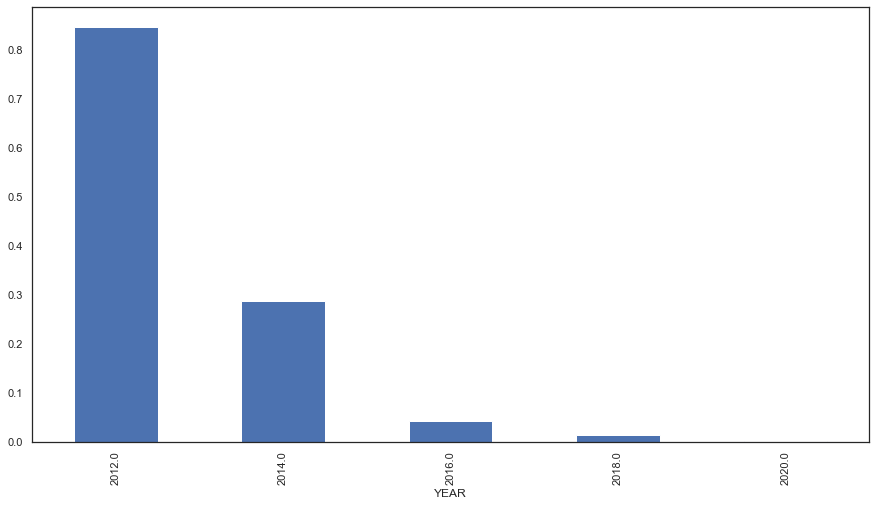

In [44]:
(df[df.pev_cap==0].groupby("YEAR").count()["pev_cap"]/df.groupby("YEAR").count()["pev_cap"]).plot(kind="bar")

# Results
@us-totals provides a first validation of the research hypothesis. Registered plugin electric vehicles (PEVs) and public charging stations are normalized by population and plotted over the eight year analysis period for the United States. The two infrastructure show a similar exponential increase, suggesting there is a correlation between their adoption but giving no indication of temporal phasing or causality.

The classical Granger causality test assumes stationary data, which is not the case here based on visual inspection and confirmed by ADF and KPSS tests. Several non-linear extensions to Granger causality have been developed in recent years (REF). One challenge applying such methods to our application is that non-linear methods require a larger time series than the five annual totals purchased from Experian. We address this limitation by leveraging the multiple observations available in each year. 

In [45]:
if not publish:
    # check matrix calculation by hand
    w_queen = Queen.from_dataframe(gdf[0:10])
    xW = w_queen.sparse*gdf[0:10].cEVSE_cap.values

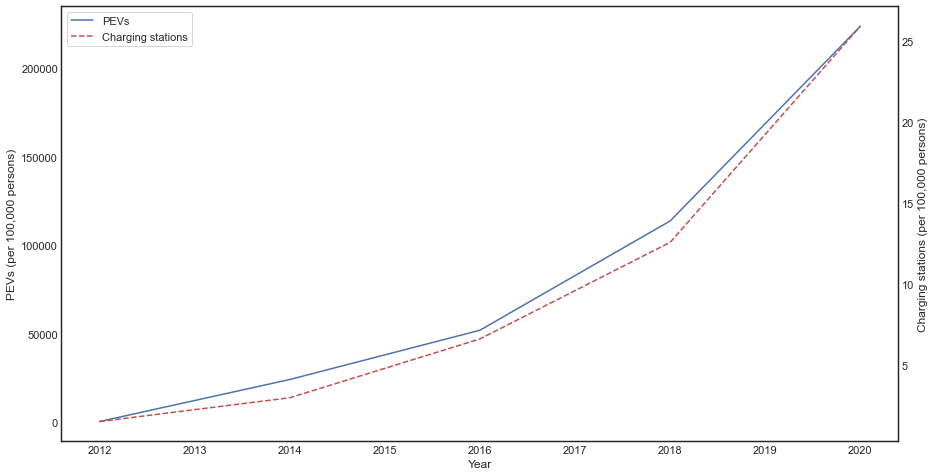

In [46]:
#| layout-ncol: 1
#| label: us-totals
#| fig-cap: "US BEV Registrations and Charging Stations"
plt.style.use('seaborn-white')
us_tot = df.groupby("YEAR").sum().reset_index()
us_tot["pev_cap"] = (us_tot["pev"]/us_tot["ALUBE001"])*100000
us_tot["cEVSE_cap"] = ((us_tot["cEVSE-L01"]+us_tot["cEVSE-L02"]+us_tot["cEVSE-L03"])/us_tot["ALUBE001"])*100000

fig, ax = plt.subplots()
x = us_tot.YEAR
y1 = us_tot.bev_cap
y2 = us_tot.cEVSE_cap

ax2 = ax.twinx()
ln1 = ax.plot(x, y1, '-b', label='PEVs')
ln2 = ax2.plot(x,y2, '--r', label="Charging stations")
ax.set_xlabel('Year')
ax.set_ylabel('PEVs (per 100,000 persons)')
ax2.set_ylabel('Charging stations (per 100,000 persons)')
ax2.grid(False)
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left', frameon=True);

plt.show()

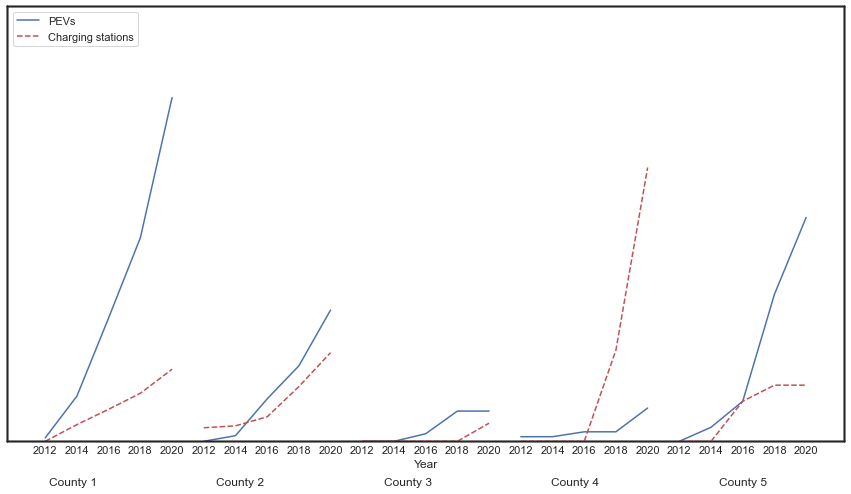

In [47]:
np.random.seed(seed=98765)
plt.style.use('seaborn-white')
GEOID_list = np.random.choice(pd.unique(df.GEOID),size=5,replace=False)
sub_df = df[df.GEOID.isin(GEOID_list)]
sub_df = sub_df.groupby(["GEOID","YEAR"]).sum().reset_index()
sub_df["pev_cap"] = (sub_df["pev"]/sub_df["ALUBE001"])*100000
sub_df["cEVSE_cap"] = ((sub_df["cEVSE-L01"]+sub_df["cEVSE-L02"]+sub_df["cEVSE-L03"])/sub_df["ALUBE001"])*100000
ymin = 0
ymax = 600 # maximum pev_cap value
ymax2 = 250 # maximum cEVSE_cap value

fig, ax = plt.subplots()
for i, j in enumerate(GEOID_list):
    x = sub_df[sub_df.GEOID==j].YEAR+i*10
    y1 = sub_df[sub_df.GEOID==j].pev_cap
    y2 = sub_df[sub_df.GEOID==j].cEVSE_cap

    ax2 = ax.twinx()
    ax.axes.yaxis.set_visible(False)
    ax2.axes.yaxis.set_visible(False)
    ax.set_ylim([ymin, ymax])
    ax2.set_ylim([ymin, ymax2])
    
    if i==0:
        ln1 = ax.plot(x, y1, '-b', label='PEVs')
        ln2 = ax2.plot(x,y2, '--r', label="Charging stations")
        ax2.grid(False)  
    else:
        ax.plot(x, y1, '-b', label='PEVs')
        ax2.plot(x,y2, '--r', label="Charging stations")
    ax.annotate('County {0}'.format(i+1), 
             xy=(0.05+i*0.2, -0.1), # these are the coordinates to position the label
             xycoords='axes fraction') # you can pass any extra params too
    
ax.set_xticks([i for i in range (2012,2061,2)])
ax.set_xticklabels([i for i in range(2012,2021,2)]*5)
ax.set_xlabel('Year')
ax.legend(lns, labs, loc='upper left', frameon=True);
plt.show()

The Bipartisan Infrsatructure Act places a strong focus on equitable investment allocation. Equity can be explored both inter-regionally and intra-regionally by key demographic features. Figure 2 compares the distribution of charging stations for four representative cities. Omaha is located in the central Great Plains, a region that has received minimal exploration in the EV literature. Chicago and Detroit are large cities with well-documented histories of housing segregation (REF). San Francisco is included as an example of a large city in a progressive state. In all four cities, charging stations are concentrated in the central city. San Francisco does not show clear evidence of inequality, likely partially as a function of the overall high density of charging stations. However, Chicago and Detroit both show clear patterns of low charging station density in their majority-minority communities and unexpectedly high station densities in low density suburban communities. While there are few charging stations in Omamah, those outside its downtown are located along an east-west axis along the I-80 corridor. There are few stations in north and south Omaha, which are enclaves of black and hispanic residents, respectively.

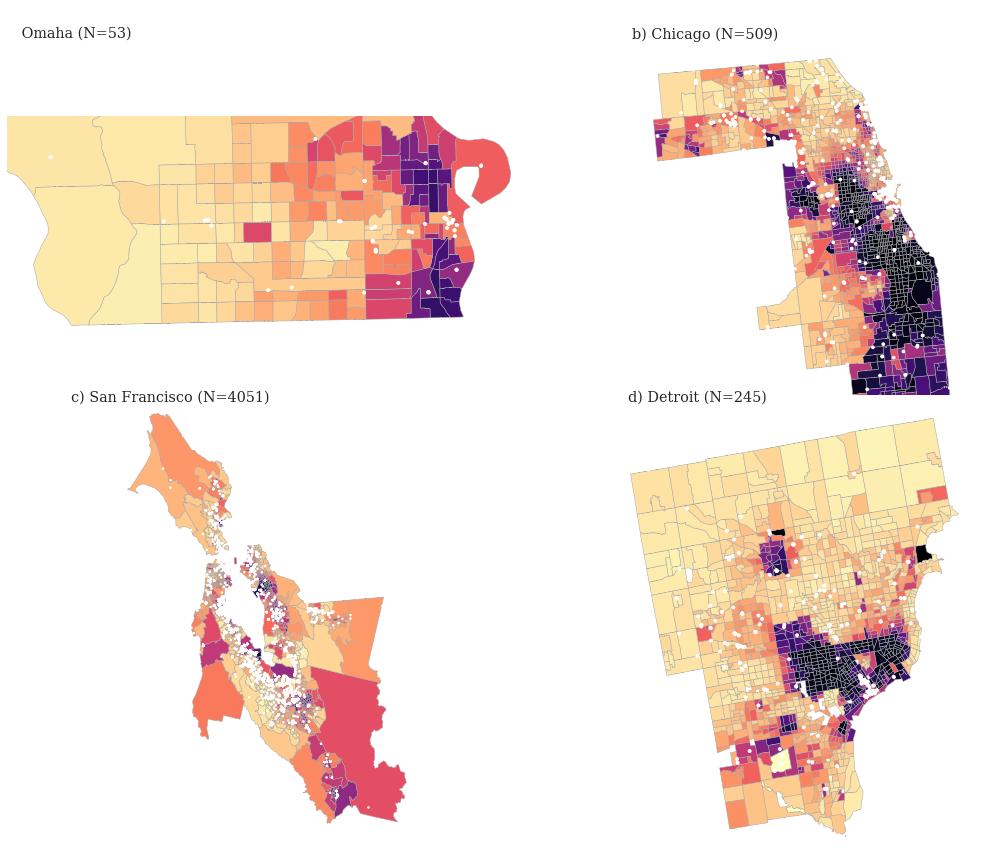

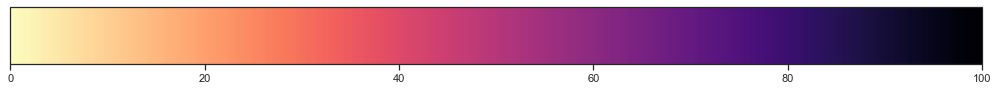

In [69]:
publish=True
if publish:
    gdf_ch_stn = gpd.read_parquet("charge_station_tracts.parquet")
    gdf_pop_tr = gpd.read_parquet("population_tracts.parquet")
else:
    df_pop_tr = pd.read_csv("../Data/Census/Population_Race_Tract/nhgis0008_ds248_2020_tract.csv", encoding='latin-1')
    tract_sf = gpd.read_file("../Data/GIS/cb_2020_us_tract_500k/cb_2020_us_tract_500k.shp")
    tract_sf = tract_sf.to_crs(4326)

    geometry = [Point(xy) for xy in zip(df_ch_stn.Longitude, df_ch_stn.Latitude)]
    crs = 4326
    gdf_ch_stn = gpd.GeoDataFrame(df_ch_stn, crs=crs, geometry=geometry)

    df_pop_tr['GEOID'] = df_pop_tr['GEOID'].map(lambda x: x.lstrip('14000'))
    tract_sf['AFFGEOID'] = tract_sf['AFFGEOID'].map(lambda x: x.lstrip('1400000'))

    gdf_pop_tr = tract_sf.merge(df_pop_tr, left_on = 'AFFGEOID', right_on = 'GEOID', how = 'inner')
    gdf_pop_tr.loc[:,["STATEFP","COUNTYFP"]] = gdf_pop_tr.loc[:,["STATEFP","COUNTYFP"]].astype(int)
    # Minority is hispanic, black, native american, pacific islander, and some other race alone (do not include mixed race for simplicity)
    gdf_pop_tr['Minority_Percent'] = ((gdf_pop_tr['U7C002']+gdf_pop_tr['U7C006']+gdf_pop_tr['U7C007']+gdf_pop_tr['U7C009']+gdf_pop_tr['U7C010'])/gdf_pop_tr['U7C001'])*100
    gdf_pop_tr = gdf_pop_tr[~gdf_pop_tr.Minority_Percent.isnull()]
    gdf_ch_stn.to_parquet("charge_station_tracts.parquet")
    gdf_pop_tr.to_parquet("population_tracts.parquet")

norm = plt.Normalize(0, 100)

# Plotting
projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
fig, axs = plt.subplot_mosaic([["a)","b)"],["c)","d)"]], subplot_kw={'projection': projection}, figsize=(15, 12))
fig.tight_layout()

for label, ax in axs.items():
    #
    if label=="a)":
        statefp = [31]
        countyfp = [55]
        size = 3
        y_trans = 1.25
        dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
        label = " Omaha (N={0})".format(dfplot.shape[0])
    elif label=="b)":
        statefp = [17]
        # countyfp = ['031', '043', '197']
        countyfp = [31]
        size = 2.7
        y_trans=-20/72
        dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
        label+=" Chicago (N={0})".format(dfplot.shape[0])
    elif label=="c)":
        statefp = [6]
        countyfp = [75, 81, 41, 1, 85]
        size = 1.5
        y_trans=5/72
        dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
        label+=" San Francisco (N={0})".format(dfplot.shape[0])
    else:
        statefp = [26]
        countyfp = [163, 125, 99]
        size = 3
        y_trans=5/72
        dfplot = gdf_ch_stn[(gdf_ch_stn['STATEFP'].isin(statefp)) & (gdf_ch_stn['COUNTYFP'].isin(countyfp))]
        label+=" Detroit (N={0})".format(dfplot.shape[0])
        
    gplt.choropleth(
      gdf_pop_tr[(gdf_pop_tr['STATEFP'].isin(statefp)) & (gdf_pop_tr['COUNTYFP'].isin(countyfp))],
      hue = "Minority_Percent",
      # legend=True,
      # legend_kwargs={'boundaries': (0,100,200,300,400)},
      edgecolor='darkgrey',
      linewidth=.5,
      cmap="magma_r",
      norm = norm,
      zorder = 1,
      ax=ax
    )

    gplt.pointplot(
      dfplot,
      ax = ax,
      color = 'white',
      zorder = 2,
      s = size,
    )
    trans = mtransforms.ScaledTranslation(10/72, y_trans, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='none', edgecolor='none', pad=3.0))


fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax,
    orientation='horizontal', 
    cmap='magma_r',
    norm = norm)


Another simple descriptive comparison between the PEV and charging station markets is shown in Figure 3. PEV sales market share is plotted against charging stations per thousand residents as of 2020. While there appears to be a positive correlation between these infrastructures, there are clearly other factors at play - e.g., observe the difference between California and Vermont. 

C:\Users\jhawkins17\Anaconda3\envs\geo_env\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\jhawkins17\Anaconda3\envs\geo_env\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


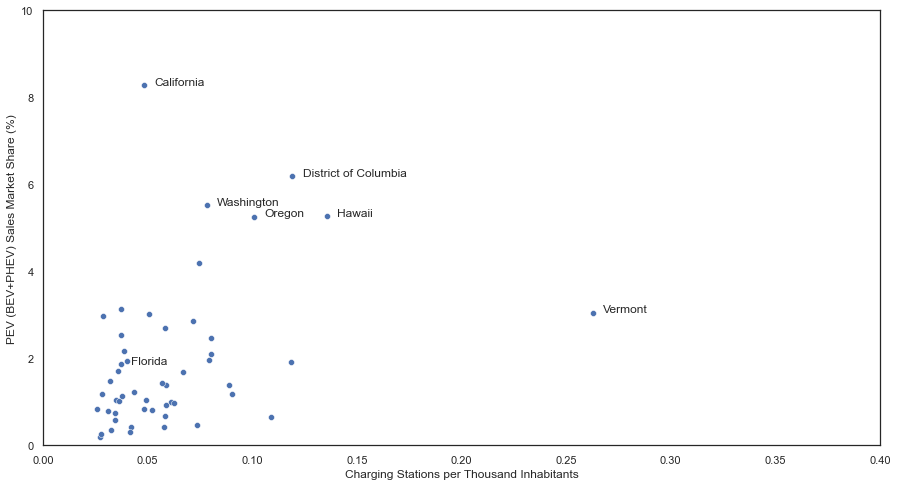

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="white")

timeseriesx = []
timeseriesy = []

merged_df = pd.DataFrame(geo_ch_stn)
#merged_df['Open Date'] = pd.to_datetime(merged_df['Open Date'])
yearpop = 2019
year = 2020

merged_year = merged_df.loc[merged_df.YEAR < yearpop]

num_stations_by_state = merged_year['State'].value_counts()

num_stations_by_state = pd.DataFrame(num_stations_by_state)
num_stations_by_state = num_stations_by_state.reset_index()
num_stations_by_state.columns = ['STATE','Charging Stations']

drop = ["PR", "ON"]

num_stations_by_state = num_stations_by_state[num_stations_by_state.STATE.isin(drop) == False]

ev_market_share = pd.read_csv("../Data/Transport/BEV-PHEV-HEV-FCEV-ICE-Sales-By State-2011-2020-EVAdoption-7.13.21.csv")

stations_vs_marketshare = pd.merge(df_pop, num_stations_by_state, left_on= "STATE", right_on="STATE", how = "right")
stations_vs_marketshare = pd.merge(stations_vs_marketshare, ev_market_share, left_on= "Geographic Area", right_on="State", how = "left")

stations_vs_marketshare['stations_cap'] = (stations_vs_marketshare['Charging Stations']/stations_vs_marketshare[str(yearpop)])*1000
stations_vs_marketshare['ev_share'] = stations_vs_marketshare['EV (BEV & PHEV) Share']*100

share_v_stations_plot = sns.scatterplot(
    data = stations_vs_marketshare,
    x="stations_cap", y="ev_share",
)
share_v_stations_plot.set_xlabel("Charging Stations per Thousand Inhabitants")
share_v_stations_plot.set_ylabel("PEV (BEV+PHEV) Sales Market Share (%)")
share_v_stations_plot.set(xlim=(0, 0.4))
share_v_stations_plot.set(ylim=(0, 10))


# Just for fun
state_labels = ["California", "Vermont", "Florida", "District of Columbia","Hawaii","Oregon", "Washington"]
i = 0
# for state in stations_vs_marketshare['Geographic Area']:
for state in state_labels:
    x = stations_vs_marketshare.loc[stations_vs_marketshare['Geographic Area'] == state, 'stations_cap'].iloc[0]
    y = stations_vs_marketshare.loc[stations_vs_marketshare['Geographic Area'] == state, 'ev_share'].iloc[0]
    share_v_stations_plot.text(x + 0.005, y - 0.001 , state)
    timeseriesx.append([])
    timeseriesy.append([])
    timeseriesx[i].append(x)
    timeseriesy[i].append(y)

    i = i + 1
    
plt.show()

In [50]:
if not publish:
    def adf_test(df):
        result = adfuller(df.values)
        print('ADF Statistics: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

    def kpss_test(df):    
        statistic, p_value, n_lags, critical_values = kpss(df.values)

        print(f'KPSS Statistic: {statistic}')
        print(f'p-value: {p_value}')
        print(f'num lags: {n_lags}')
        print('Critial Values:')
        for key, value in critical_values.items():
            print(f'   {key} : {value}')

    print('ADF Test: BEV time series')
    adf_test(us_tot['bev_cap'])
    print('ADF Test: cEVSE_cap time series')
    adf_test(us_tot['cEVSE_cap'])

    print('KPSS Test: BEV time series')
    kpss_test(us_tot['bev_cap'])
    print('KPSS Test: cEVSE_cap time series')
    kpss_test(us_tot['cEVSE_cap'])

Both ADF and KPSS tests indicate that the BEV and charging station data are non-stationary. Therefore, we will difference the data, as required by the Granger causality test.


In [51]:
if not publish:
    us_tot_diff = us_tot.diff().dropna()
    print('ADF Test: BEV transformed time series')
    adf_test(us_tot_diff['bev_cap'])
    print('ADF Test: cEVSE_cap transformed time series')
    adf_test(us_tot_diff['cEVSE_cap'])

The differences didn't help and we don't have a long enough time series to use a longer lag. Let's take a look at it by state.


In [52]:
# # Neither time series is stationary for any state
# state_list = pd.unique(df.STATE)
# 
# for st in state_list:
#   st_tot = df[df.STATE==st].groupby("year").sum().reset_index()
#   st_tot["bev_cap"] = (st_tot["bev"]/st_tot["ALUBE001"])*100000
#   st_tot["cEVSE_cap"] = ((st_tot["cEVSE-L01"]+st_tot["cEVSE-L02"]+st_tot["cEVSE-L03"])/st_tot["ALUBE001"])*100000
#   #print('ADF Test: BEV time series for {0}'.format(st))
#   adf_test(st_tot['bev_cap']);
#   #print('ADF Test: cEVSE_cap time series for {0}'.format(st))
#   adf_test(st_tot['cEVSE_cap']);

Let's try a non-linear causality analysis from Rosol et al.


In [53]:
# def run_nonlin(data_train, data_test, max_lag):
#     results = nonlincausalityMLP(x=data_train, maxlag=max_lag, Dense_layers=2, Dense_neurons=[100, 100], x_test=data_test, run=1, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     results_ARIMA = nonlincausalityARIMA(x=data_train, maxlag=max_lag, x_test=data_train)
#     
#     results_GRU = nonlincausalityGRU(x=data_train, maxlag=max_lag, GRU_layers=2, GRU_neurons=[25, 25], Dense_layers=2, Dense_neurons=[100, 100], x_test=data_test, run=3, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     results_LSTM = nonlincausalityLSTM(x=data_train, maxlag=max_lag, LSTM_layers=2, LSTM_neurons=[25, 25], Dense_layers=2, Dense_neurons=[100, 100], x_test=data_test, run=3, add_Dropout=True, Dropout_rate=0.01, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     results_NN = nonlincausalityNN(x=data_train, maxlag=max_lag, NN_config=["l", "dr", "g", "dr", "d", "dr"], NN_neurons=[5, 0.1, 5, 0.1, 5, 0.1], x_test=data_test, run=3, epochs_num=[50, 100], learning_rate=[0.001, 0.0001], batch_size_num=128, verbose=False, plot=True)
#     
#     #%% Example of obtaining the results
#     lags = [1,2,3,4,5]
#     models = ["MLP","ARIMA","GRU","LSTM","NN"]
#     index = pd.MultiIndex.from_tuples(list(itertools.product(models, lags)), names=["model", "lag"])
#     granger_df = pd.DataFrame(index=index,columns=["cohens_d","test_stat","p_value"])
#     
#     for name, res in {"MLP":results, "ARIMA":results_ARIMA, "GRU":results_GRU, "LSTM":results_LSTM, "NN":results_NN}.items():
#     
#         for lag in lags:
#             p_value = res[lag].p_value
#             test_stat = res[lag].test_statistic
#     
#             best_errors_X = res[lag].best_errors_X
#             best_errors_XY = res[lag].best_errors_XY
#     
#             cohens_d = np.abs(
#                 (np.mean(np.abs(best_errors_X)) - np.mean(np.abs(best_errors_XY)))
#                 / np.std([best_errors_X, best_errors_XY])
#             )
#             print("For lag = %d Cohen's d = %0.3f" % (lag, cohens_d))
#             print(f"test statistic = {0} p-value = {1}".format(test_stat,p_value))
#             granger_df.loc[(name,lag),"cohens_d"] = cohens_d
#             granger_df.loc[(name,lag),"test_stat"] = test_stat
#             granger_df.loc[(name,lag),"p_value"] = p_value
#     return granger_df
# 
# lag = 5 # number of years
# 
# cty_list = pd.unique(df.GEOID)
# train_cty, test_cty = np.split(cty_list, [int(len(cty_list)*0.7)])
# data_train = df.loc[df.GEOID.isin(train_cty),["pev_cap","cEVSE_cap"]].values
# data_test = df.loc[df.GEOID.isin(test_cty),["pev_cap","cEVSE_cap"]].values
# 
# # Run assuming PEV registrations cause charging station installations
# run_nonlin(data_train,data_test,lag).to_csv("granger_df_pev_ch.csv")
# 
# data_train = df.loc[df.GEOID.isin(train_cty),["cEVSE_cap","pev_cap"]].values
# data_test = df.loc[df.GEOID.isin(test_cty),["cEVSE_cap","pev_cap"]].values
# 
# # Run assuming PEV registrations cause charging station installations
# run_nonlin(data_train,data_test,lag).to_csv("granger_df_ch_pev.csv")
# 
# data_train = df.loc[df.GEOID.isin(train_cty),["cEVSE_cap_lag","pev_cap"]].values
# data_test = df.loc[df.GEOID.isin(test_cty),["cEVSE_cap_lag","pev_cap"]].values
# 
# # Run assuming PEV registrations cause charging station installations - using lagged data
# run_nonlin(data_train,data_test,lag).to_csv("granger_df_ch_pev_lag.csv")

In [54]:
# Load in the Granger causality results and create a table from it
df_gr_pev_ch = pd.read_csv("granger_df_pev_ch.csv")
df_gr_ch_pev = pd.read_csv("granger_df_ch_pev.csv")
df_gr_ch_pev_lag = pd.read_csv("granger_df_ch_pev_lag.csv")
df_gr_pev_ch_lag = pd.read_csv("granger_df_pev_ch_lag.csv")
df1 = df_gr_pev_ch.merge(df_gr_ch_pev,how="left",on=["model","lag"],suffixes=("_pc","_cp"))
df2 = df_gr_ch_pev_lag.merge(df_gr_pev_ch_lag,how="left",on=["model","lag"],suffixes=("_pcl","_cpl"))
df1 = df1.merge(df2,how="left",on=["model","lag"])
# Filter out columns where none of the cohens_d are significant
df1 = df1[(df1.p_value_pc<0.05) | (df1.p_value_cp<0.05) | (df1.p_value_pcl<0.05) | (df1.p_value_cpl<0.05)]

# Style the table
def bold_sig(v, p_val_col = "", props='', threshold=0.05):
    if p_val_col not in df1:
        return np.full(v.shape, "")
    return np.where(df1[p_val_col].le(threshold), props, "")

df1.sort_values(by=["model","lag"],inplace=True)
df1.style.apply(bold_sig, p_val_col="p_value_pc", props="font-weight: bold;", subset=( "cohens_d_pc"), axis=0, threshold=0.05) \
.apply(bold_sig, p_val_col="p_value_cp", props="font-weight: bold;", subset=( "cohens_d_cp"), axis=0, threshold=0.05) \
.apply(bold_sig, p_val_col="p_value_pcl", props="font-weight: bold;", subset=( "cohens_d_pcl"), axis=0, threshold=0.05) \
.apply(bold_sig, p_val_col="p_value_cpl", props="font-weight: bold;", subset=( "cohens_d_cpl"), axis=0, threshold=0.05) \
.hide(subset=["p_value_pc","p_value_cp","p_value_pcl","p_value_cpl"], axis="columns") \
.hide(axis="index").format(precision=3) \
.highlight_max(subset=["cohens_d_pc","cohens_d_cp","cohens_d_pcl","cohens_d_cpl"], color='grey', axis=0, props=None)

model,lag,cohens_d_pc,cohens_d_cp,cohens_d_pcl,cohens_d_cpl
ARIMA,1,0.012,0.031,0.027,0.030
ARIMA,2,0.010,0.029,0.026,0.026
ARIMA,3,0.013,0.018,0.025,0.031
ARIMA,4,0.005,0.025,0.016,0.024
ARIMA,5,0.000,0.018,0.010,0.005
GRU,1,0.131,0.199,0.156,0.258
LSTM,1,0.240,0.231,0.133,0.035
LSTM,2,0.211,0.157,0.101,0.357
LSTM,3,0.196,0.069,0.145,0.062
LSTM,5,0.144,0.094,0.102,0.264


In [55]:
gps = GPS_Regressor(verbose=True)
check = gdf[gdf.YEAR==2020]
T = gdf['cEVSE_cap']
y = gdf['pev_cap']
# Covariates are spatial lag charging stations, state FE, percent minority, and income in $1000
X = pd.concat([gdf.xW,gdf.filter(like="sy_",axis=1),gdf.Percent_Minority,gdf.ABDPE001/1000],axis=1)
#X = pd.concat([check.Percent_Minority,check.ABDPE001/1000],axis=1)

gps.fit(T=T, X = X, y=y);
gps_results = gps.calculate_CDRC(0.95)

Using the following params for GPS model:
{   'gps_family': None,
    'lower_grid_constraint': 0.01,
    'max_iter': 100,
    'n_splines': 30,
    'random_seed': None,
    'spline_order': 3,
    'treatment_grid_num': 100,
    'upper_grid_constraint': 0.99,
    'verbose': True}
Determined the outcome variable is of type continuous...
Must fit `normal` GLM family to model treatment since
                treatment takes on zero or negative values...
Saving GPS values...
Fitting GAM using treatment and GPS...
Calculating many CDRC estimates for each treatment grid value...

            Generating predictions for each value of treatment grid,
            and averaging to get the CDRC...


C:\Users\jhawkins17\Anaconda3\envs\geo_env\lib\site-packages\causal_curve\gps_core.py:452: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  self.gam_results.summary()


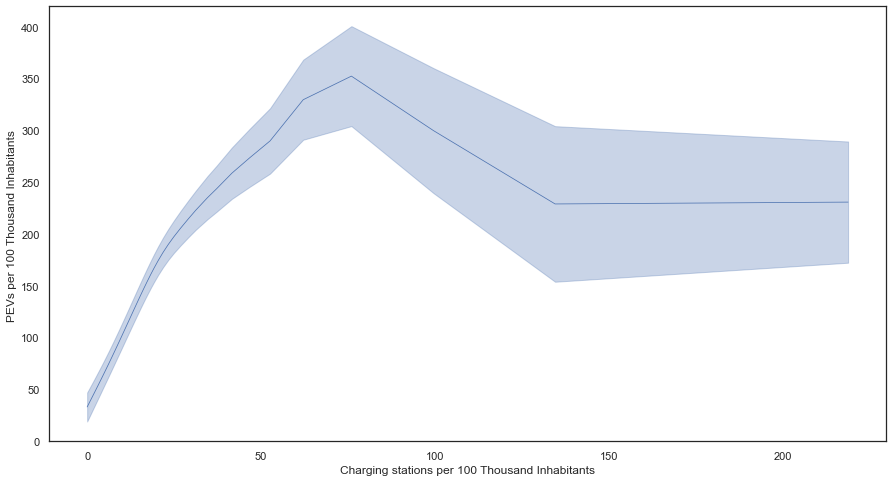

In [56]:
def plot_mean_and_CI(ax, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    ax.fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    ax.plot(treatment, mean, color_mean, linewidth=0.75)

fig, ax = plt.subplots()
    
treat = gps_results['Treatment']
mean = gps_results['Causal_Dose_Response']
lb = gps_results['Lower_CI']
ub = gps_results['Upper_CI']
plot_mean_and_CI(ax, treat, mean, lb, ub, color_mean='b', color_shading='b')

# Labels
ax.set_ylabel('PEVs per 100 Thousand Inhabitants ');
ax.set_xlabel('Charging stations per 100 Thousand Inhabitants');

Mediation effects

In [57]:
if not publish:
    med = Mediation(
        bootstrap_draws=500,
        bootstrap_replicates=100,
        spline_order=3,
        n_splines=5,
        random_seed=111,
        verbose=False,
        #treatment_grid_num=4
    )

    med.fit(
        T=gdf["STC2ERTA"],
        M=gdf["cEVSE_cap"],
        y=gdf["pev_cap"],
    )

    med_results = med.calculate_mediation(ci = 0.95)

In [58]:
if not publish:
    # Use cubic interpolation to create plot of relationship between charging station rate and the proportion of democratic votes
    f = interp1d(med_results['Treatment_Value'], med_results['Proportion_Indirect_Effect'], kind='cubic', bounds_error=False, fill_value=0)
    PIR_grid = np.linspace(0, 2120, num=100, endpoint=True)

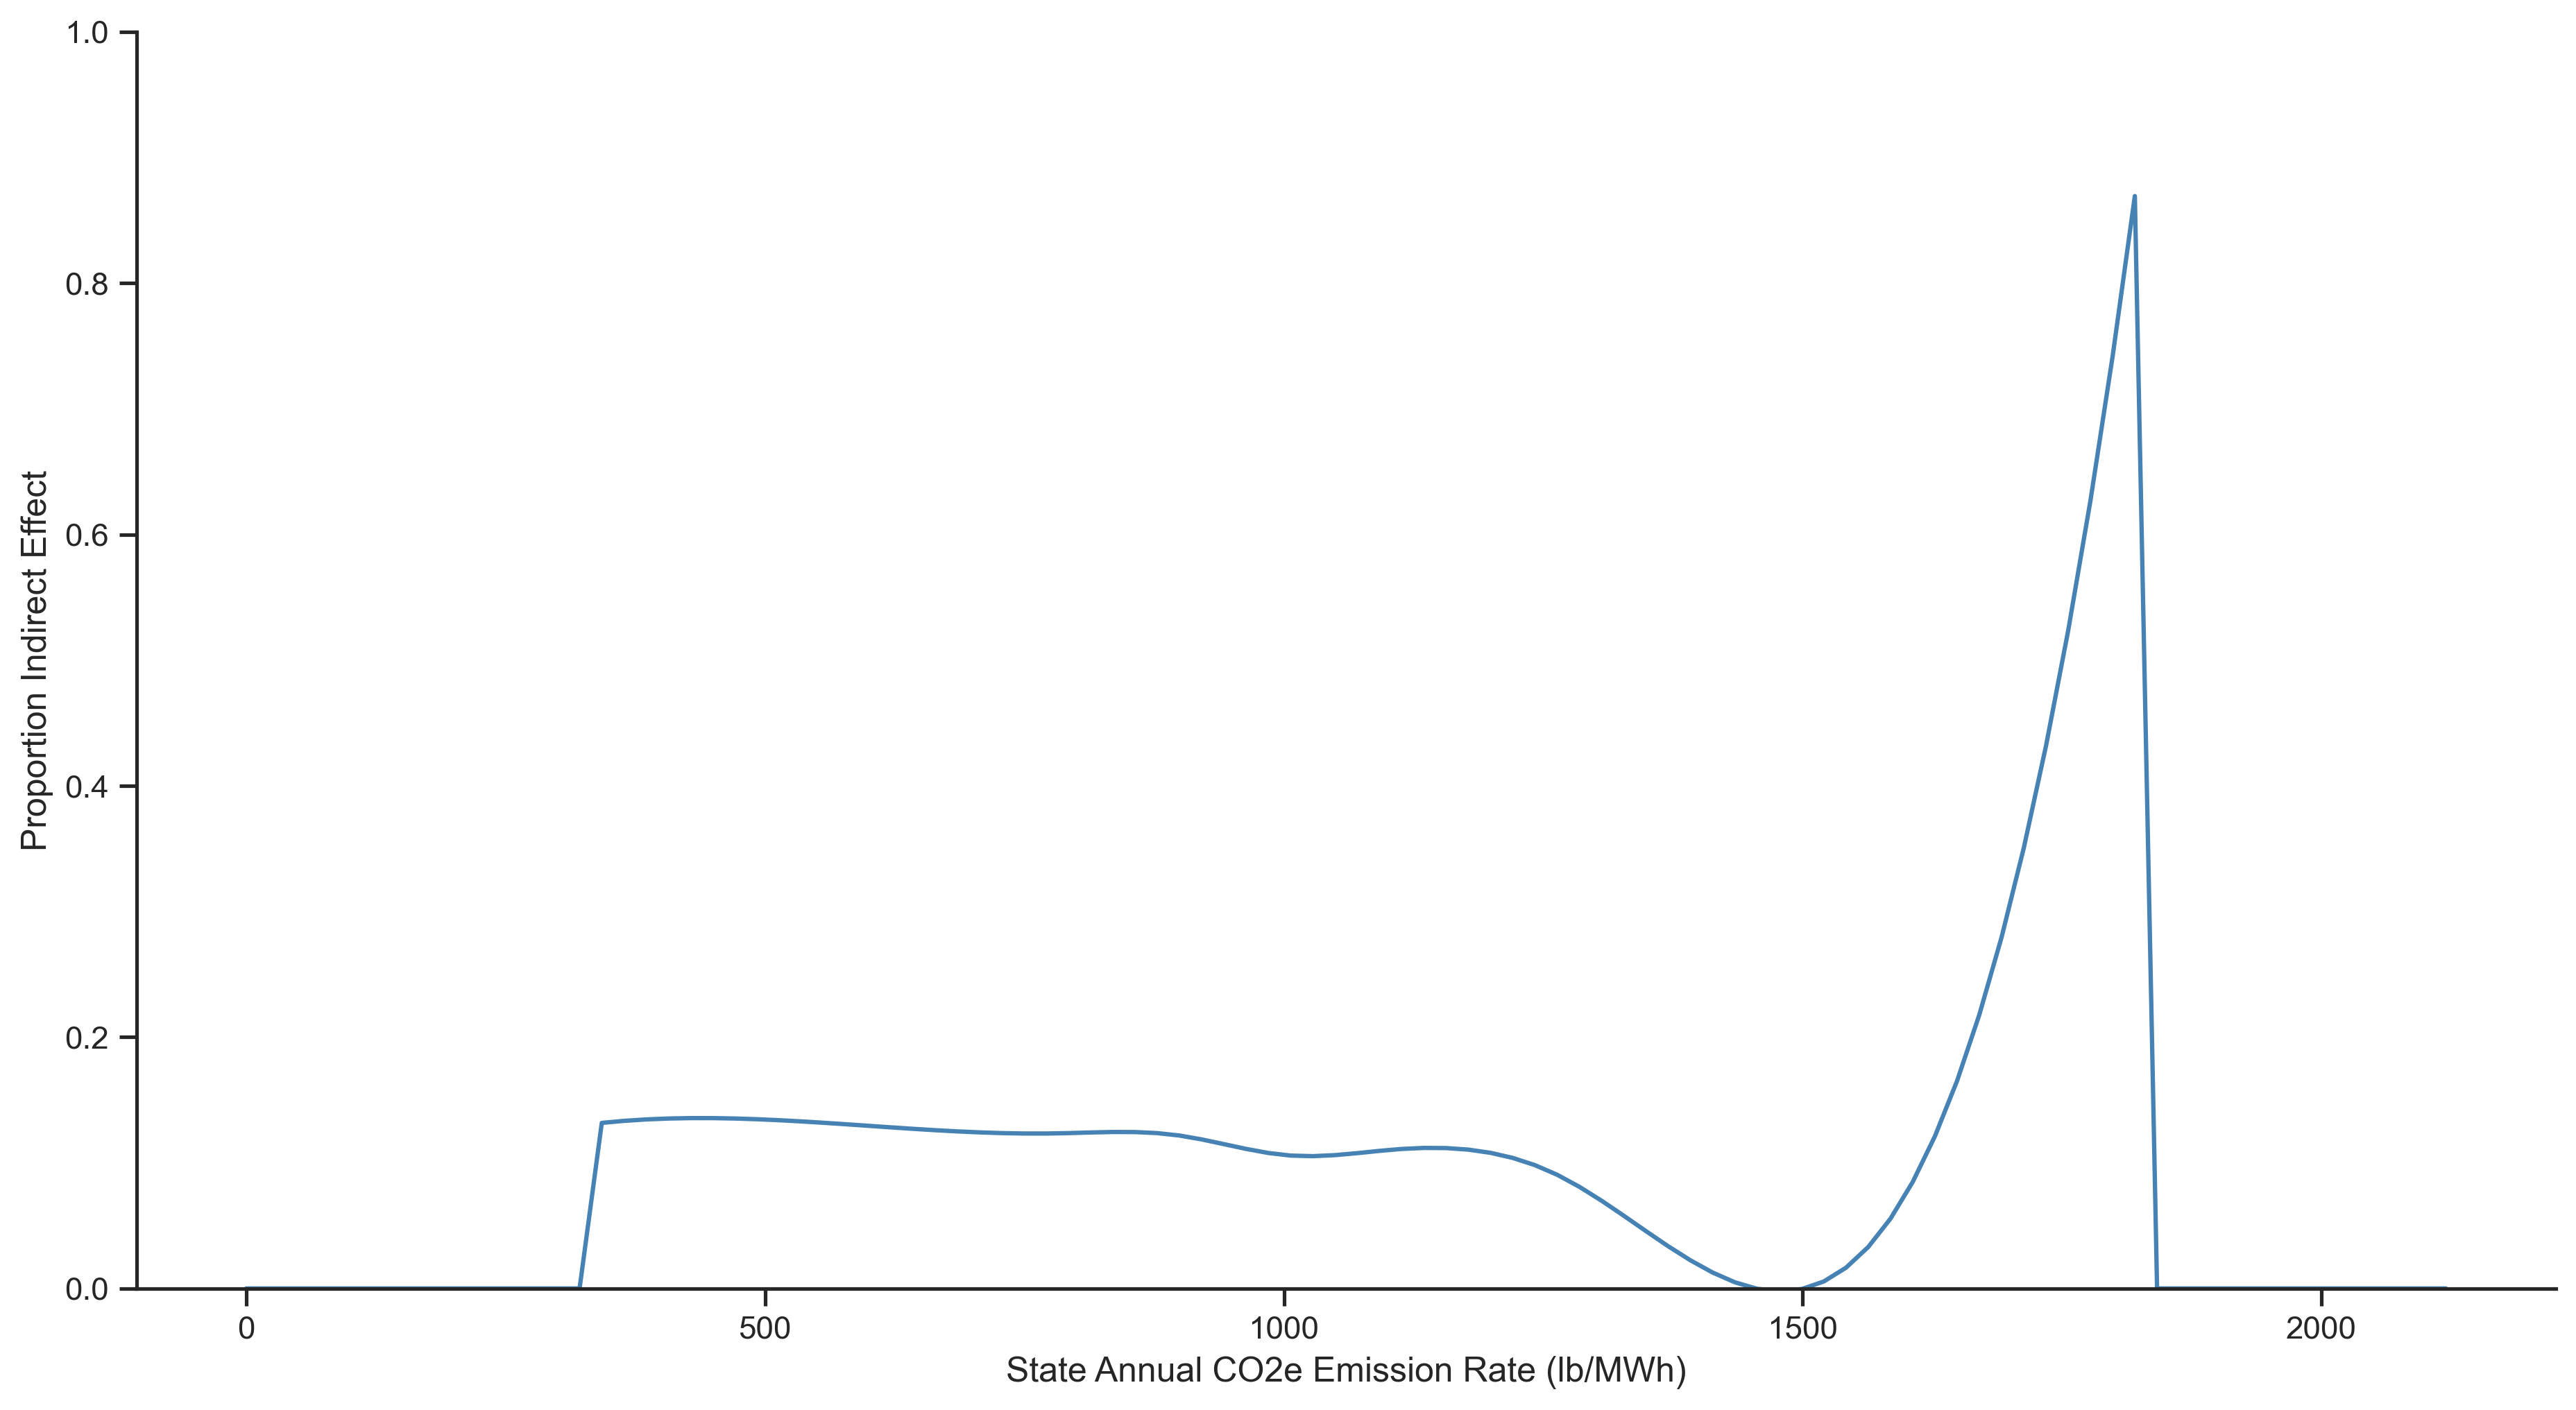

In [59]:
if publish:
    image = Image.open('mediation_curve_co2.png')
    display(image)
else:
    ax = plt.subplot(111)  
    ax.plot(PIR_grid, f(PIR_grid), color = 'steelblue')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.set_ylabel('Proportion Indirect Effect')
    ax.set_xlabel('State Annual CO2e Emission Rate (lb/MWh)')
    ax.set_ylim(0,1)
    ax.tick_params(axis='both', which='major')
    plt.savefig('mediation_curve_co2.png', bbox_inches='tight', dpi = 300)

In [60]:
if not publish:
    med = Mediation(
        bootstrap_draws=500,
        bootstrap_replicates=100,
        spline_order=3,
        n_splines=5,
        random_seed=111,
        verbose=False,
        #treatment_grid_num=4
    )

    med.fit(
        T=gdf["percent_dem"],
        M=gdf["cEVSE_cap"],
        y=gdf["pev_cap"],
    );

    med_results = med.calculate_mediation(ci = 0.95)

In [61]:
if not publish:
    # Use cubic interpolation to create plot of relationship between charging station rate and the proportion of democratic votes
    f = interp1d(med_results['Treatment_Value'], med_results['Proportion_Indirect_Effect'], kind='cubic', bounds_error=False, fill_value=0)
    PIR_grid = np.linspace(0, 1, num=100, endpoint=True)

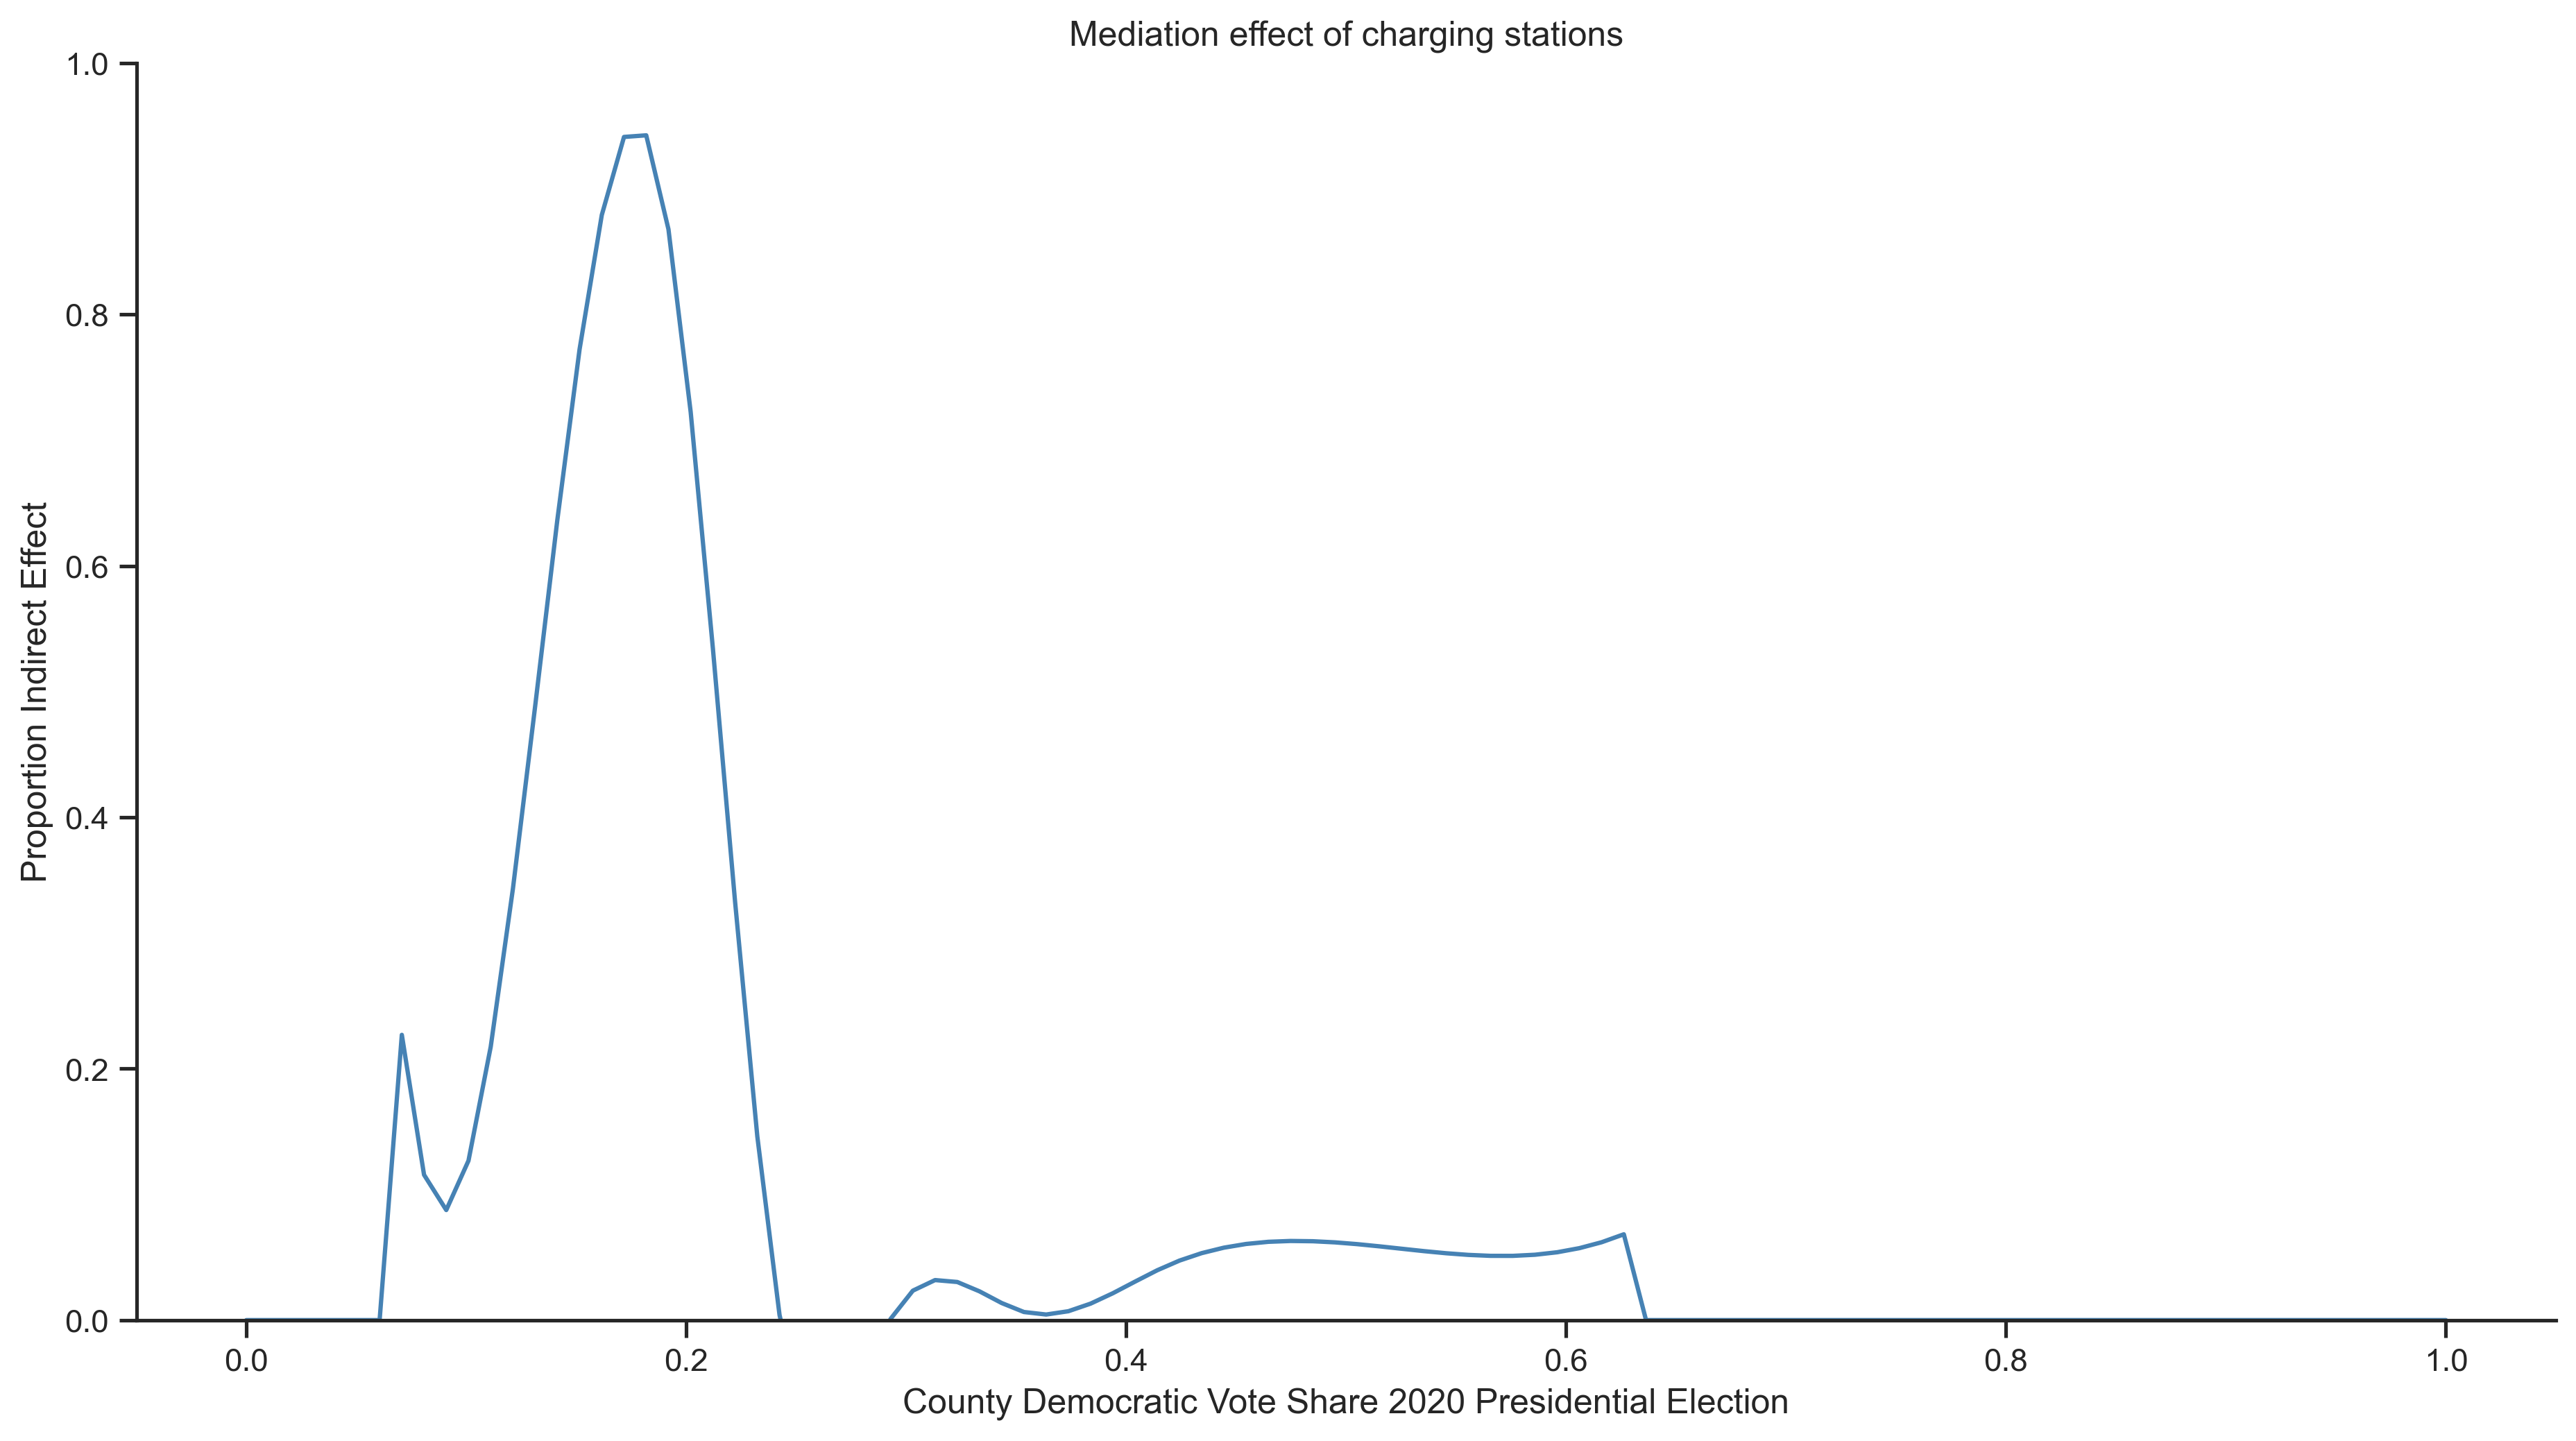

In [62]:
if publish:
    image = Image.open('mediation_curve_elections.png')
    display(image)
else:
    ax = plt.subplot(111)  
    ax.plot(PIR_grid, f(PIR_grid), color = 'steelblue')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    ax.set_ylabel('Proportion Indirect Effect')
    ax.set_xlabel('County Democratic Vote Share 2020 Presidential Election')
    ax.set_ylim(0,1)
    ax.set_title("Mediation effect of charging stations")
    ax.tick_params(axis='both', which='major')
    plt.savefig('mediation_curve_elections.png', bbox_inches='tight', dpi = 300)

In [63]:
if not publish:
    gam = gps.gam_results
    for i, term in enumerate(gam.terms):
        if term.isintercept:
            continue

        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        plt.figure()
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi, c='r', ls='--')
        plt.title(repr(term))
        plt.show()

In [64]:
mr = gps.gps_results
df_mod = pd.concat([mr.params,mr.tvalues],axis=1)
df_mod.columns = ["est.","t-stat"]
filt_idx = df_mod[df_mod.index.str.contains("sy_")].index
df_mod.style.hide(subset=filt_idx, axis="index").format({'est.': "{:.2}","t-stat":"{:.2f}"})

,est.,t-stat
xW,0.019,13.10
Percent_Minority,-7.3,-1.28
ABDPE001,-0.28,-4.75


In [65]:
# state_fips_to_abbrev = {"st__1":"AL","st__2":"AK","st__4":"AZ","st__5":"AR","st__6":"CA","st__8":"CO","st__9":"CT","st__10":"DE","st__11":"DC","st__12":"FL","st__13":"GA","st__15":"HI","st__16":"ID","st__17":"IL","st__18":"IN","st__19":"IA","st__20":"KS",
#                         "st__21":"KY","st__22":"LA","st__23":"ME","st__24":"MD","st__25":"MA","st__26":"MI","st__27":"MN","st__28":"MS","st__29":"MO","st__30":"MT","st__31":"NE","st__32":"NV","st__33":"NH","st__34":"NJ","st__35":"NM","st__36":"NY",
#                         "st__37":"NC","st__38":"ND","st__39":"OH","st__40":"OK","st__41":"OR","st__42":"PA","st__44":"RI","st__45":"SC","st__46":"SD","st__47":"TN","st__48":"TX","st__49":"UT","st__50":"VT","st__51":"VA","st__53":"WA","st__54":"WV",
#                         "st__55":"WI","st__56":"WY","st__60":"AS","st__66":"GU","st__69":"MP","st__72":"PR","st__78":"VI"}

In [66]:
# temp = df_mod["est."].filter(like="st_")
# temp.index = temp.index.map(state_fips_to_abbrev)
# #temp["AL"] = 0
# ax = temp.plot(kind="bar")
# # Labels
# ax.set_ylabel('State Fixed Effect');
# ax.set_xlabel('State');

# Discussion

# Conclusions

The results presented herein are preliminary and do not consider a key dataset -- vehicle registrations. We will expand our analysis to a more robust inferential study in the coming months. Our causal question is what effect public charging stations have on electric vehicle registrations at the county-level. The treatment variable is continuous over the study period. We propose three causal identification approaches. The first approach is a difference-in-differences approach that is identified off state-level investments in charging stations by year. The second approach is generalized propensity score matching using federal election results, state-level greenhouse gas (GHG) emissions factors, and demographic characteristics (e.g., racial composition, median income, and population density) as inputs to the propensity score.

The final causal inference approach, Granger causality, differs in that it focuses on the temporal phasing of charging station installations and PEV registration, whereas the other two approaches rely on Rubin's potential outcome assumption [@reich2021]. Granger causality relies on the assumption that past treatment knowledge reduces predictive uncertainty. It is a form of time series causal inference that would fit the current context well.

# 